In [1]:
%load_ext autoreload
%autoreload 2
from simulate_genome import *
from alignment_tools_comparison import *
from global_var import *

In [2]:
# read db using the gffutils library
db_direct = DB_DIRECT + 'pieris_napi.db'
gene_hierarchy_direct = PKL_DIRECT + 'gene_hierarchy_dict_pieris_napi.pkl'
genome_direct = FASTA_DIRECT + 'pieris_napi/Pieris_napi-GCA_905231885.1-softmasked.fa'
prot_direct = FASTA_DIRECT + "pieris_napi/data/Pnap.GCA_905231885.1-softmasked.brakerProt_rename_agat.prot.fa"

In [3]:
Pieris_napi_sim_genome = genome_constructor(db_direct,
                                            gene_hierarchy_direct,
                                            genome_direct,
                                            seed = 20)

In [4]:
Pieris_napi_genome_mut_left = Pieris_napi_sim_genome.read_genome('genome_test.fa',
                                                                 return_=True)

In [5]:
Pieris_napi_genome_mut_right = Pieris_napi_sim_genome.read_genome('genome_test_after.fa',
                                                                  return_=True)

In [6]:
genes_sample = Pieris_napi_sim_genome.read_pkl_file(PKL_DIRECT + 'gene_sample_20.pkl')

### Compare alignment tools

#### Dump a file with the queries - in this case the protein sequences of our genes sample.

In [7]:
prot_queries_direct = "prot_query_test.fa"

Pieris_napi_prot_seq = Pieris_napi_sim_genome.collect_protein_seqs(file_direct=prot_direct,
                                                                   split_ref="gene=")

Pieris_napi_ID_gene = Pieris_napi_sim_genome.get_alignment_queries(Pieris_napi_prot_seq,
                                                                   list(genes_sample['genes_sample_20'].keys()),
                                                                   prot_queries_direct)

gene_ID_dict = {j:i for i, j in Pieris_napi_ID_gene.items()}

### 1. Exonerate

In [8]:
exonerate_model = 'protein2genome'
output_format = 'exonerate-vulgar'

In [9]:
Pieris_napi_tools_comp = compare_tools()

In [10]:
# ###################################
# # run exonerate on genome with no mutations 
# ###################################
# Pieris_napi_tools_comp.run_exonerate(exonerate_model,
#                                     prot_queries_direct,
#                                     genome_direct,
#                                     'exonerate_no_mut_out.txt'
#                                    )

In [11]:
hits_overlaping = Pieris_napi_tools_comp.parse_exonerate_output_only_higher_score_hits('exonerate_no_mut_out.txt',
                                                                                        output_format,
                                                                                        genes_sample['genes_order'])

Pieris_napi_tools_comp.check_overlaps(genes_sample['genes_loc'], hits_overlaping)

all hits are within the regions of interest


In [12]:
# ###################################
# # run exonerate on genome with mutations to the left
# ###################################
# Pieris_napi_tools_comp.run_exonerate(exonerate_model,
#                                      prot_queries_direct,
#                                     'genome_test.fa',
#                                     'exonerate_mut_before_out.txt'
#                                    )

In [13]:
overlap_hits_mut_before = Pieris_napi_tools_comp.parse_exonerate_output_only_higher_score_hits('exonerate_mut_before_out.txt',
                                                                                                output_format,
                                                                                                genes_sample['genes_order'])


In [14]:
Pieris_napi_tools_comp.check_overlaps(genes_sample['genes_loc_before'], overlap_hits_mut_before)

all hits are within the regions of interest


In [15]:
###################################
# run exonerate on genome with mutations to the right
###################################
# Pieris_napi_tools_comp.run_exonerate(exonerate_model,
#                                      prot_queries_direct,
#                                     'genome_test_after.fa',
#                                     'exonerate_mut_after_out.txt'
#                                    )

In [16]:
# mutations right
overlap_hits_mut_after = Pieris_napi_tools_comp.parse_exonerate_output_only_higher_score_hits('exonerate_mut_after_out.txt',
                                                                                              output_format,
                                                                                              genes_sample['genes_order']
                                                                                             )


In [17]:
Pieris_napi_tools_comp.check_overlaps(genes_sample['genes_loc_after'],
                                      overlap_hits_mut_after)

all hits are within the regions of interest


In [18]:
mut_loc_list = ['', 'before','after']
overlaping_queries_list = [hits_overlaping,
                           overlap_hits_mut_before,
                           overlap_hits_mut_after]
genes_location_list = [genes_sample['genes_loc'],
                       genes_sample['genes_loc_before'],
                       genes_sample['genes_loc_after']]
sim_genes_bkdown_list = [genes_sample['simulated_sample_20_before'],
                         genes_sample['simulated_sample_20_before'],
                         genes_sample['simulated_sample_20_after']]
new_exons_intervals = [genes_sample['new_exons_intervals_before'],
                       genes_sample['new_exons_intervals_before'],
                       genes_sample['new_exons_intervals_after'],]
genomes_list = [Pieris_napi_sim_genome.genome,
                Pieris_napi_genome_mut_left,
                Pieris_napi_genome_mut_right]

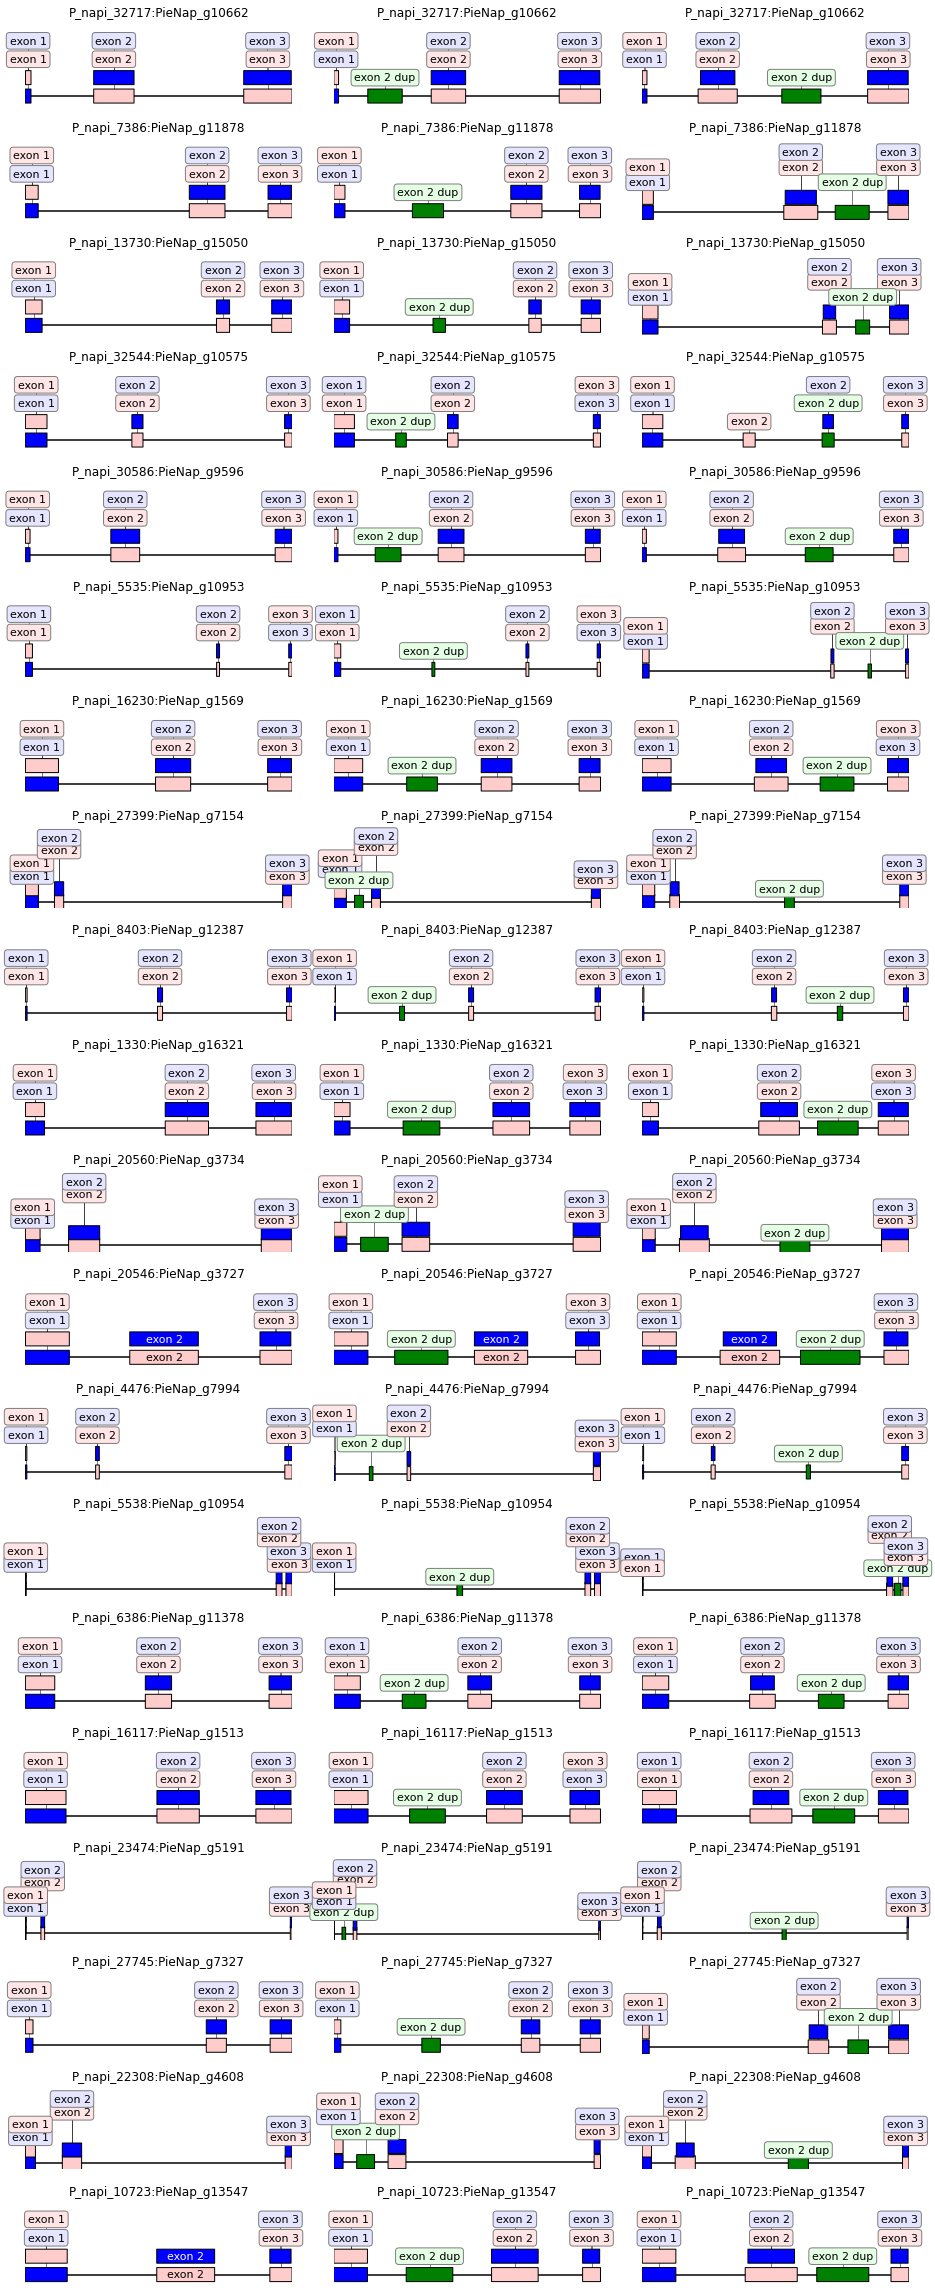

In [19]:
Pieris_napi_tools_comp.visualize_seq_alignments(overlaping_queries_list,
                                                genes_location_list,
                                                sim_genes_bkdown_list,
                                                mut_loc_list,
                                                genomes_list,
                                                2,
                                                Pieris_napi_ID_gene,
                                                new_exons_intervals,
                                               'exonerate_seq_align_Pieris_napis.jpg')

### 2. splan

### 3. miniprot